In [1]:
# #!/usr/bin/env python3
# # -*- coding: utf-8 -*-
# """
# Created on Mon Feb 27 11:11:44 2023

# @author: bas
# copied from: https://github.com/xpsi-group/xpsi/blob/main/examples/examples_fast/Synthetic_data.ipynb
# """



# import os
# import numpy as np
# import math


# from matplotlib import pyplot as plt
# from matplotlib import rcParams
# from matplotlib.offsetbox import AnchoredText
# from matplotlib.ticker import MultipleLocator, AutoLocator, AutoMinorLocator
# from matplotlib import gridspec
# from matplotlib import cm
# from matplotlib.patches import Rectangle
# import matplotlib.patches as mpatches


# import xpsi
# from xpsi import Parameter, HotRegions, Elsewhere
# from scipy.interpolate import Akima1DInterpolator
# from xpsi.global_imports import _c, _G, _dpr, gravradius, _csq, _km, _2pi
# from xpsi.tools.synthesise import synthesise_exposure_no_scaling as _synthesise # no scaling!

# import sys
# sys.path.append('../')
# from custom_tools import CustomInstrumentJ1808, CustomHotRegion, CustomHotRegion_Accreting, CustomHotRegion_Accreting_te_const, CustomPhotosphere_BB, CustomPhotosphere_N4, CustomPhotosphere_N5, CustomPhotosphere_A5, CustomPhotosphere_A4, CustomSignal, CustomPrior, CustomPrior_NoSecondary, plot_2D_pulse, CustomBackground_BlackBody, CustomBackground_DiskBB, SynthesiseData, CustomInterstellar, get_T_in_log10_Kelvin, get_mids_from_edges, plot_one_pulse



# from custom_tools import sinfunc, fitsin, sin2func, fit2sin

# ################################## SETTINGS ###################################

# second = False
# te_index = 0

# try: #try to get parameters from shell input
#     os.environ.get('atmosphere_type')    
#     atmosphere_type = os.environ['atmosphere_type']
#     os.environ.get('n_params')
#     n_params = os.environ['n_params']
# except:
#     atmosphere_type = "A"
#     n_params = "5"

# if atmosphere_type == 'N':
#     exposure_time=50000. #Reproducing NSX atmosphere data would require exposure time of 984307.6661
# elif atmosphere_type == 'A':
#     exposure_time=1.32366e5 ## is the same as Mason 2019
# else:
#     print('Problem with exposure time!')
# print("atmosphere_type:", atmosphere_type)
# print("n_params:", n_params)

# ################################## INSTRUMENT #################################
# channel_low = 20
# channel_hi = 300 #600
# max_input = 1400 #2000

# NICER = CustomInstrumentJ1808.from_response_files(ARF = '../model_data/J1808/ni2584010103mpu7_arf_aeff.txt',
#                                                   RMF = '../model_data/J1808/ni2584010103mpu7_rmf_matrix.txt',
#                                                   channel_edges = '../model_data/J1808/ni2584010103mpu7_rmf_energymap.txt',
#                                                   channel_low=channel_low,
#                                                   channel_hi=channel_hi,
#                                                   max_input=max_input)

# # NICER = CustomInstrumentJ1808.from_response_files(ARF = '../model_data/J1808/saxj1808_2019_arf_aeff.txt',
# #                                                   RMF = '../model_data/J1808/saxj1808_2019_rmf_matrix_padded.txt',
# #                                                   channel_edges = '../model_data/J1808/saxj1808_2019_rmf_energymap.txt',
# #                                                   channel_low=channel_low,
# #                                                   channel_hi=channel_hi,
# #                                                   max_input=max_input)

# ############################### SPACETIME #####################################

# bounds = dict(distance = (0.1, 10.0),                       # (Earth) distance
#                 mass = (1.0, 3.0),                          # mass
#                 radius = (3.0 * gravradius(1.0), 16.0),     # equatorial radius
#                 cos_inclination = (0.0, 1.0))               # (Earth) inclination to rotation axis

# spacetime = xpsi.Spacetime(bounds=bounds, values=dict(frequency=401.0))# Fixing the spin

# ############################### SINGLE HOTREGION ##############################

# num_leaves = 128
# sqrt_num_cells = 128
# num_rays = 512

# kwargs = {'symmetry': 'azimuthal_invariance', #call general integrator instead of for azimuthal invariance
#           'interpolator': 'split',
#           'omit': False,
#           'cede': False,
#           'concentric': False,
#           'sqrt_num_cells': sqrt_num_cells,
#           'min_sqrt_num_cells': 10,
#           'max_sqrt_num_cells': 128,
#           'num_leaves': num_leaves,
#           'num_rays': num_rays,
#           'prefix': 'p'}
# values = {}
# bounds = dict(super_colatitude = (None, None),
#               super_radius = (None, None),
#               phase_shift = (0.0, 0.1))
# if atmosphere_type=='A':
#     bounds['super_tbb'] = (0.001, 0.003)
#     bounds['super_tau'] = (0.5, 3.5)
#     if n_params=='5':
#         bounds['super_te'] = (40., 200.)
#         primary = CustomHotRegion_Accreting(bounds, values, **kwargs)
#     elif n_params=='4':    
#         primary = CustomHotRegion_Accreting_te_const(bounds, values, **kwargs)
# elif atmosphere_type=='N':
#     bounds['super_temperature'] = (5.1, 6.8)
#     if n_params=='4':
#         primary = xpsi.HotRegion(bounds, values, **kwargs)
#     elif n_params=='5':
#         kwargs['modulated'] = True
#         bounds['super_modulator'] = (-0.3, 0.3)
#         primary = CustomHotRegion(bounds, values, **kwargs)
# elif atmosphere_type=='B':
#     bounds['super_temperature'] = (5.1, 6.8)
#     primary = CustomHotRegion(bounds, values, **kwargs)

# hot = HotRegions((primary,))


# ################################### ELSEWHERE ################################

# elsewhere = Elsewhere(bounds=dict(elsewhere_temperature = (None,None)))

# ################################ ATMOSPHERE ################################### 
      

# photosphere = CustomPhotosphere_A5(hot = hot, elsewhere = elsewhere,
#                                 values=dict(mode_frequency = spacetime['frequency']))
# # LOCAL
# photosphere.hot_atmosphere = '/home/bas/Documents/Projects/x-psi/model_datas/bobrikova/Bobrikova_compton_slab.npz'
# # SNELLIUS
# #photosphere.hot_atmosphere = '/home/dorsman/xpsi-bas-fork/AMXPs/model_data/Bobrikova_compton_slab.npz'

    
# ################################### STAR ######################################

# star = xpsi.Star(spacetime = spacetime, photospheres = photosphere)

# #################################### PRIOR ####################################

# prior = CustomPrior_NoSecondary()

# ################################## INTERSTELLAR ###################################

# interstellar = CustomInterstellar.from_SWG("/home/bas/Documents/Projects/x-psi/xpsi-bas-fork/AMXPs/model_data/n_H/TBnew/tbnew0.14.txt", bounds=(None, None), value=None)

# ############################### BACKGROUND ####################################

# background = CustomBackground_DiskBB(bounds=(None, None), values={}, interstellar = interstellar)

# ###################### SYNTHESISE DATA #################################

# phases_space = np.linspace(0.0, 1.0, 33)
# _data = SynthesiseData(np.arange(channel_low,channel_hi), phases_space, 0, channel_hi-channel_low-1)

# ################################## SIGNAL ###################################

# signal = CustomSignal(data = _data,
#                         instrument = NICER, #Instrument
#                         background = background,
#                         interstellar = interstellar,
#                         cache = True,
#                         prefix='Instrument') # I can't change this?                          


# ################################# LIKELIHOOD ###############################

# likelihood = xpsi.Likelihood(star = star, signals = signal,
#                              num_energies=128, #384
#                              threads=8, #1
#                              externally_updated=False,
#                              prior = prior)                             

# for h in hot.objects:
#     h.set_phases(num_leaves)


# print("Prossecco ...")

# # SAX J1808-like 
# mass = 1.4 #1.2 #1.4
# radius =  12 #10 #12 # 11 # 
# distance = 3.5
# inclination = 60 #10 #60
# cos_i = math.cos(inclination*math.pi/180)

# # Hotspot
# phase_shift = 0
# super_colatitude = 20*math.pi/180 # #45*math.pi/180 #  5*math.pi/180 
# super_radius =  15.5*math.pi/180 # 40*math.pi/180 #  0.001 makes it go away # 

# # Compton slab model parameters
# tbb=0.0017 # for Kajava+ 2011 0.0012  # 0.0015 #   # 0.001 -0.003 Tbb(data) = Tbb(keV)/511keV, 1 keV = 0.002 data
# te=100. # 60. # # 40-200 corresponds to 20-100 keV (Te(data) = Te(keV)*1000/511keV), 50 keV = 100 data
# tau=1. # 0.5 #0.5 - 3.5 tau = ln(Fin/Fout)

# # elsewhere
# elsewhere_T_keV = 0.5 # keV  for Kajava+ 2011  0.4  # 0.45 # 

# # source background
# column_density = 1.17 #10^21 cm^-2
# diskbb_T_keV = 0.3 # keV for Kajava+ 2011 0.2 #keV #
# r_in = 50 # 30 #25  # 20 # 1 #  km #  for very small diskBB background

# p = [mass, #1.4, #grav mass
#       radius,#12.5, #coordinate equatorial radius
#       distance, # earth distance kpc
#       cos_i, #cosine of earth inclination
#       phase_shift, #phase of hotregion
#       super_colatitude, #colatitude of centre of superseding region
#       super_radius,  #angular radius superceding region
#       tbb,
#       te,
#       tau
#       ]

# elsewhere_T_log10_K = get_T_in_log10_Kelvin(elsewhere_T_keV)
# p.append(elsewhere_T_log10_K) # 10^x Kelvin

# diskbb_T_log10_K = get_T_in_log10_Kelvin(diskbb_T_keV)
# p.append(diskbb_T_log10_K)

# K_disk = cos_i*(r_in/(distance/10))**2  # (km / 10 kpc)^2

# p.append(K_disk)

# if isinstance(interstellar, xpsi.Interstellar):

#     p.append(column_density)

# Instrument_kwargs = dict(exposure_time=exposure_time,
#                          name='J1808_synthetic',
#                          directory='./data/')



In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Feb 27 11:11:44 2023

@author: bas
copied from: https://github.com/xpsi-group/xpsi/blob/main/examples/examples_fast/Synthetic_data.ipynb
"""



import os
import numpy as np
import math


from matplotlib import pyplot as plt
from matplotlib import rcParams
from matplotlib.offsetbox import AnchoredText
from matplotlib.ticker import MultipleLocator, AutoLocator, AutoMinorLocator
from matplotlib import gridspec
from matplotlib import cm
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches


import xpsi
from xpsi import Parameter, HotRegions, Elsewhere
from scipy.interpolate import Akima1DInterpolator
from xpsi.global_imports import _c, _G, _dpr, gravradius, _csq, _km, _2pi
from xpsi.tools.synthesise import synthesise_exposure_no_scaling as _synthesise # no scaling!

import sys
sys.path.append('../')
from custom_tools import CustomInstrumentJ1808, CustomHotRegion, CustomHotRegion_Accreting, CustomHotRegion_Accreting_te_const, CustomPhotosphere_BB, CustomPhotosphere_N4, CustomPhotosphere_N5, CustomPhotosphere_A5, CustomPhotosphere_A4, CustomSignal, CustomPrior, CustomPrior_NoSecondary, plot_2D_pulse, CustomBackground_BlackBody, CustomBackground_DiskBB, SynthesiseData, CustomInterstellar, get_T_in_log10_Kelvin, get_mids_from_edges, plot_one_pulse



from custom_tools import sinfunc, fitsin, sin2func, fit2sin

################################## SETTINGS ###################################

second = False
te_index = 0

try: #try to get parameters from shell input
    os.environ.get('atmosphere_type')    
    atmosphere_type = os.environ['atmosphere_type']
    os.environ.get('n_params')
    n_params = os.environ['n_params']
except:
    atmosphere_type = "A"
    n_params = "5"

if atmosphere_type == 'N':
    exposure_time=50000. #Reproducing NSX atmosphere data would require exposure time of 984307.6661
elif atmosphere_type == 'A':
    exposure_time=1.32366e5 ## is the same as Mason 2019
else:
    print('Problem with exposure time!')
print("atmosphere_type:", atmosphere_type)
print("n_params:", n_params)

################################## INSTRUMENT #################################
channel_low = 20
channel_hi = 300 #600
max_input = 1400 #2000

NICER = CustomInstrumentJ1808.from_response_files(ARF = '../model_data/J1808/ni2584010103mpu7_arf_aeff.txt',
                                                  RMF = '../model_data/J1808/ni2584010103mpu7_rmf_matrix.txt',
                                                  channel_edges = '../model_data/J1808/ni2584010103mpu7_rmf_energymap.txt',
                                                  channel_low=channel_low,
                                                  channel_hi=channel_hi,
                                                  max_input=max_input)

# NICER = CustomInstrumentJ1808.from_response_files(ARF = '../model_data/J1808/saxj1808_2019_arf_aeff.txt',
#                                                   RMF = '../model_data/J1808/saxj1808_2019_rmf_matrix_padded.txt',
#                                                   channel_edges = '../model_data/J1808/saxj1808_2019_rmf_energymap.txt',
#                                                   channel_low=channel_low,
#                                                   channel_hi=channel_hi,
#                                                   max_input=max_input)

############################### SPACETIME #####################################

bounds = dict(distance = (0.1, 10.0),                       # (Earth) distance
                mass = (1.0, 3.0),                          # mass
                radius = (3.0 * gravradius(1.0), 16.0),     # equatorial radius
                cos_inclination = (0.0, 1.0))               # (Earth) inclination to rotation axis

spacetime = xpsi.Spacetime(bounds=bounds, values=dict(frequency=401.0))# Fixing the spin

############################### SINGLE HOTREGION ##############################

num_leaves = 128
sqrt_num_cells = 128
num_rays = 512

kwargs = {'symmetry': 'azimuthal_invariance', #call general integrator instead of for azimuthal invariance
          'interpolator': 'split',
          'omit': False,
          'cede': False,
          'concentric': False,
          'sqrt_num_cells': sqrt_num_cells,
          'min_sqrt_num_cells': 10,
          'max_sqrt_num_cells': 128,
          'num_leaves': num_leaves,
          'num_rays': num_rays,
          'prefix': 'p'}
values = {}
bounds = dict(super_colatitude = (None, None),
              super_radius = (None, None),
              phase_shift = (0.0, 0.1))
if atmosphere_type=='A':
    bounds['super_tbb'] = (0.001, 0.003)
    bounds['super_tau'] = (0.5, 3.5)
    if n_params=='5':
        bounds['super_te'] = (40., 200.)
        primary = CustomHotRegion_Accreting(bounds, values, **kwargs)
    elif n_params=='4':    
        primary = CustomHotRegion_Accreting_te_const(bounds, values, **kwargs)
elif atmosphere_type=='N':
    bounds['super_temperature'] = (5.1, 6.8)
    if n_params=='4':
        primary = xpsi.HotRegion(bounds, values, **kwargs)
    elif n_params=='5':
        kwargs['modulated'] = True
        bounds['super_modulator'] = (-0.3, 0.3)
        primary = CustomHotRegion(bounds, values, **kwargs)
elif atmosphere_type=='B':
    bounds['super_temperature'] = (5.1, 6.8)
    primary = CustomHotRegion(bounds, values, **kwargs)

hot = HotRegions((primary,))


################################### ELSEWHERE ################################

elsewhere = Elsewhere(bounds=dict(elsewhere_temperature = (None,None)))

################################ ATMOSPHERE ################################### 
      

photosphere = CustomPhotosphere_A5(hot = hot, elsewhere = elsewhere,
                                values=dict(mode_frequency = spacetime['frequency']))
# LOCAL
photosphere.hot_atmosphere = '/home/bas/Documents/Projects/x-psi/model_datas/bobrikova/Bobrikova_compton_slab.npz'
# SNELLIUS
#photosphere.hot_atmosphere = '/home/dorsman/xpsi-bas-fork/AMXPs/model_data/Bobrikova_compton_slab.npz'

    
################################### STAR ######################################

star = xpsi.Star(spacetime = spacetime, photospheres = photosphere)

#################################### PRIOR ####################################

prior = CustomPrior_NoSecondary()

################################## INTERSTELLAR ###################################

interstellar = CustomInterstellar.from_SWG("/home/bas/Documents/Projects/x-psi/xpsi-bas-fork/AMXPs/model_data/n_H/TBnew/tbnew0.14.txt", bounds=(None, None), value=None)

############################### BACKGROUND ####################################

background = CustomBackground_DiskBB(bounds=(None, None), values={}, interstellar = interstellar)

###################### SYNTHESISE DATA #################################

phases_space = np.linspace(0.0, 1.0, 33)
_data = SynthesiseData(np.arange(channel_low,channel_hi), phases_space, 0, channel_hi-channel_low-1)

################################## SIGNAL ###################################

signal = CustomSignal(data = _data,
                        instrument = NICER, #Instrument
                        background = background,
                        interstellar = interstellar,
                        cache = True,
                        prefix='Instrument') # I can't change this?                          


################################# LIKELIHOOD ###############################

likelihood = xpsi.Likelihood(star = star, signals = signal,
                             num_energies=128, #384
                             threads=8, #1
                             externally_updated=False,
                             prior = prior)                             

for h in hot.objects:
    h.set_phases(num_leaves)


print("Prossecco ...")

# SAX J1808-like 
mass = 1.4 #1.4
radius =  12 #12 # 11 # 
distance = 3.5
inclination = 60 
cos_i = math.cos(inclination*math.pi/180)

# Hotspot
phase_shift = 0
super_colatitude = 45*math.pi/180 #  5*math.pi/180 
super_radius =  15.5*math.pi/180 #  0.001 makes it go away # 

# Compton slab model parameters
tbb=0.0012  # 0.0015 #   # 0.001 -0.003 Tbb(data) = Tbb(keV)/511keV, 1 keV = 0.002 data
te=100. # # 40-200 corresponds to 20-100 keV (Te(data) = Te(keV)*1000/511keV), 50 keV = 100 data
tau=1 #0.5 - 3.5 tau = ln(Fin/Fout)

# elsewhere
elsewhere_T_keV = 0.4  # 0.45 # 

# source background
column_density = 1.17 #10^21 cm^-2
diskbb_T_keV = 0.25 #keV #
r_in = 30 #25  # 20 # 1 #  km #  for very small diskBB background

p = [mass, #1.4, #grav mass
      radius,#12.5, #coordinate equatorial radius
      distance, # earth distance kpc
      cos_i, #cosine of earth inclination
      phase_shift, #phase of hotregion
      super_colatitude, #colatitude of centre of superseding region
      super_radius,  #angular radius superceding region
      tbb,
      te,
      tau
      ]

elsewhere_T_log10_K = get_T_in_log10_Kelvin(elsewhere_T_keV)
p.append(elsewhere_T_log10_K) # 10^x Kelvin

diskbb_T_log10_K = get_T_in_log10_Kelvin(diskbb_T_keV)
p.append(diskbb_T_log10_K)

K_disk = cos_i*(r_in/(distance/10))**2  # (km / 10 kpc)^2
p.append(K_disk)

if isinstance(interstellar, xpsi.Interstellar):

    p.append(column_density)

Instrument_kwargs = dict(exposure_time=exposure_time,
                         name='J1808_synthetic',
                         directory='./data/')



/=============================================\
| X-PSI: X-ray Pulse Simulation and Inference |
|---------------------------------------------|
|                Version: 2.0.0               |
|---------------------------------------------|
|      https://xpsi-group.github.io/xpsi      |
\=============================================/

Imported GetDist version: 1.4
Imported nestcheck version: 0.2.1
atmosphere_type: A
n_params: 5
Setting channels for loaded instrument response (sub)matrix...
Channels set.
No parameters supplied... empty subspace created.
Creating parameter:
    > Named "frequency" with fixed value 4.010e+02.
    > Spin frequency [Hz].
Creating parameter:
    > Named "mass" with bounds [1.000e+00, 3.000e+00].
    > Gravitational mass [solar masses].
Creating parameter:
    > Named "radius" with bounds [4.430e+00, 1.600e+01].
    > Coordinate equatorial radius [km].
Creating parameter:
    > Named "distance" with bounds [1.000e-01, 1.000e+01].
    > Earth distance [kpc].
C

In [3]:
print(p)

[1.4, 12, 3.5, 0.5000000000000001, 0, 0.7853981633974483, 0.27052603405912107, 0.0012, 100.0, 1, 6.66668724957777, 6.462567266921845, 3673.4693877551035, 1.17]


In [4]:
print(likelihood)

Free parameters
---------------
mass: Gravitational mass [solar masses].
radius: Coordinate equatorial radius [km].
distance: Earth distance [kpc].
cos_inclination: Cosine of Earth inclination to rotation axis.
p__phase_shift: The phase of the hot region, a periodic parameter [cycles].
p__super_colatitude: The colatitude of the centre of the superseding region [radians].
p__super_radius: The angular radius of the (circular) superseding region [radians].
p__super_tbb: tbb.
p__super_te: te.
p__super_tau: tau.
elsewhere_temperature: log10 of the effective temperature elsewhere.
Instrument__T_in: Temperature at inner disk radius in log10 Kelvin.
Instrument__K_disk: Disk normalisation cos_i*R_in^2/D^2 in (km / 10 kpc)^2.
Instrument__column_density: Units of 10^21 cm^-2.



In [5]:
energy_mids = get_mids_from_edges(NICER.channel_edges)
phase_mids = get_mids_from_edges(phases_space)


In [6]:
likelihood.synthesise(p, force=True, Instrument=Instrument_kwargs)
counts= likelihood.signal.synthetic_data

Text(0, 0.5, 'Energy (keV)')

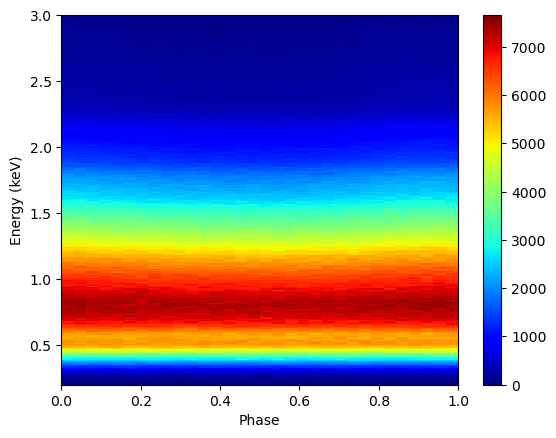

In [7]:
fig, ax = plt.subplots()
vmin = 0.
vmax = np.max(counts)

profile = ax.pcolormesh(phase_mids, energy_mids, counts, cmap=cm.jet, vmin=vmin, vmax=vmax)
plt.colorbar(profile)
ax.set_xlabel('Phase')
ax.set_ylabel('Energy (keV)')

In [8]:
print('total counts:',np.sum(counts))

total counts: 25033328.0


(<Figure size 500x300 with 2 Axes>,
 <AxesSubplot: xlabel='Phase', ylabel='Energy (keV)'>)

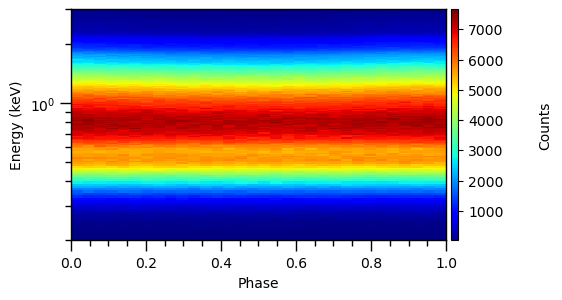

In [9]:
plot_one_pulse(counts, phase_mids, energy_mids, cm=cm.jet)

In [10]:
# Make fits

n_energies = len(energy_mids)

fit_amplitudes = []
fit_phases = []
fit_constants = []
fit_errors = np.empty((n_energies, 3))
for i in range(n_energies):
    counts_slice = counts[i] 
    (A1, p1, c1), perr = fitsin(phase_mids, counts_slice)
    fit_amplitudes.append(A1)
    fit_phases.append(p1)
    fit_constants.append(c1)
    fit_errors[i] = perr

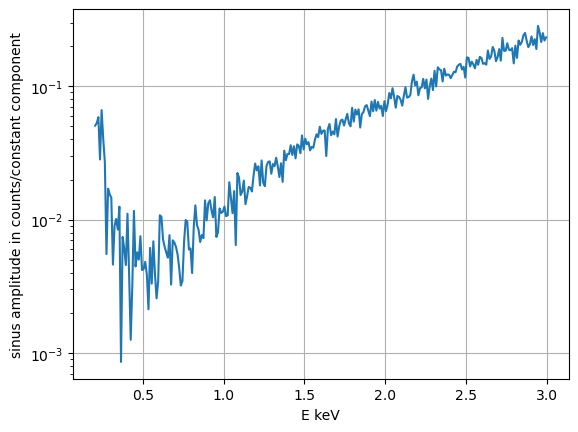

In [11]:
fig, ax = plt.subplots()
ax.semilogy(energy_mids, abs(np.asarray(fit_amplitudes)/fit_constants))
ax.set_xlabel('E keV')
ax.set_ylabel('sinus amplitude in counts/constant component')
ax.grid(True)

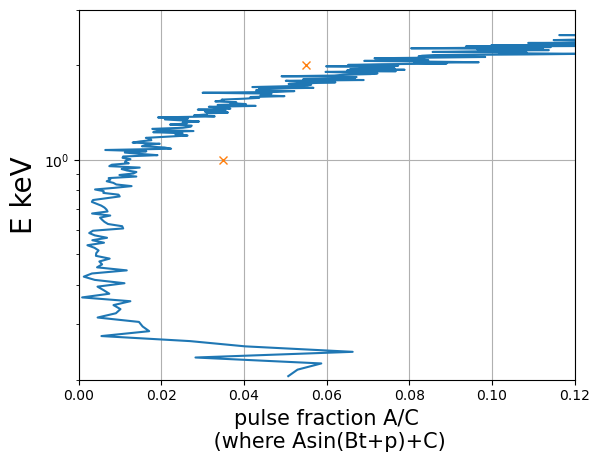

In [12]:
fig, ax = plt.subplots()
ax.semilogy(abs(np.asarray(fit_amplitudes)/fit_constants), energy_mids)
ax.plot([0.035,0.055],[1,2], 'x')
ax.set_ylabel('E keV',fontsize=20)
ax.set_xlabel('pulse fraction A/C\n (where Asin(Bt+p)+C)',fontsize=15)
ax.set_ylim([0.2,3])
ax.set_xlim([0,0.12])
ax.grid()

In [13]:
sines = np.empty(counts.shape)
for i, fit_amplitude, fit_phase, fit_constant in zip(range(n_energies), fit_amplitudes, fit_phases, fit_constants):
    sines[i]=sinfunc(phase_mids, fit_amplitude, fit_phase, abs(fit_amplitude))

In [14]:
background = counts-sines

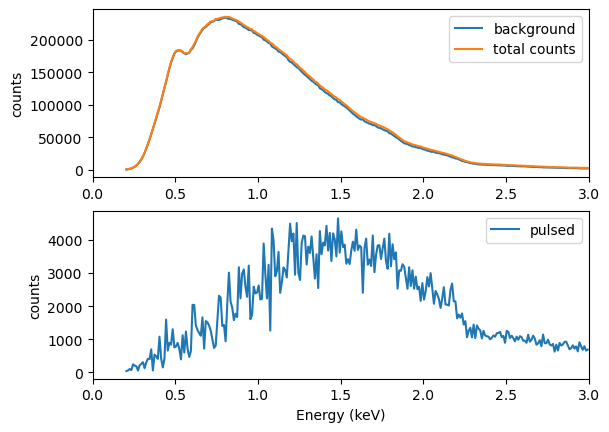

In [15]:
fig, axes = plt.subplots(2,1)
xlim = [0, 3]

average_counts = counts.sum(axis=1)
average_background = background.sum(axis=1)
average_sines = sines.sum(axis=1)
axes[0].plot(energy_mids, average_background, label='background')
axes[0].plot(energy_mids, average_counts, label='total counts')
axes[1].plot(energy_mids, average_sines, label='pulsed')
axes[1].set_xlabel('Energy (keV)')

for ax in axes:
    ax.set_ylabel('counts')
    ax.set_xlim(xlim)
    ax.legend()